<a href="https://colab.research.google.com/github/YasinnSoylu/Predict-CLTV-of-a-Customer/blob/main/Predict_CLTV_of_a_customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d gauravduttakiit/predict-cltv-of-a-customer
!unzip predict-cltv-of-a-customer.zip


  0% 0.00/1.78M [00:00<?, ?B/s]
100% 1.78M/1.78M [00:00<00:00, 152MB/s]
Archive:  predict-cltv-of-a-customer.zip
  inflating: sample_submission_9zqft7i/How to Create Sample Submission File.ipynb  
  inflating: sample_submission_9zqft7i/sample_submission.csv  
  inflating: test_koRSKBP.csv        
  inflating: train_BRCpofr.csv       


In [2]:
import os
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
import seaborn as sns

# EDA

In [3]:
df=pd.read_csv('/content/train_BRCpofr.csv')
df

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...,...
89387,89388,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,89389,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,89390,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,89391,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [4]:
test=pd.read_csv('/content/test_koRSKBP.csv')
test.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy
0,89393,Female,Rural,High School,5L-10L,0,6,2134,More than 1,B,Silver
1,89394,Female,Urban,High School,2L-5L,0,4,4102,More than 1,A,Platinum
2,89395,Male,Rural,High School,5L-10L,1,7,2925,More than 1,B,Gold
3,89396,Female,Rural,Bachelor,More than 10L,1,2,0,More than 1,B,Silver
4,89397,Female,Urban,High School,2L-5L,0,5,14059,More than 1,B,Silver


In [5]:
df = df.drop('id', axis=1)
test = test.drop('id', axis=1)

In [6]:
df.nunique()


gender                2
area                  2
qualification         3
income                4
marital_status        2
vintage               9
claim_amount      10889
num_policies          2
policy                3
type_of_policy        3
cltv              18796
dtype: int64

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89392 entries, 0 to 89391
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          89392 non-null  object
 1   area            89392 non-null  object
 2   qualification   89392 non-null  object
 3   income          89392 non-null  object
 4   marital_status  89392 non-null  int64 
 5   vintage         89392 non-null  int64 
 6   claim_amount    89392 non-null  int64 
 7   num_policies    89392 non-null  object
 8   policy          89392 non-null  object
 9   type_of_policy  89392 non-null  object
 10  cltv            89392 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 7.5+ MB


In [8]:
df.corr()

,marital_status,vintage,claim_amount,cltv
marital_status,1.000000,-0.011686,-0.114924,-0.077744
vintage,-0.011686,1.000000,0.009579,0.020608
claim_amount,-0.114924,0.009579,1.000000,0.180344
cltv,-0.077744,0.020608,0.180344,1.000000


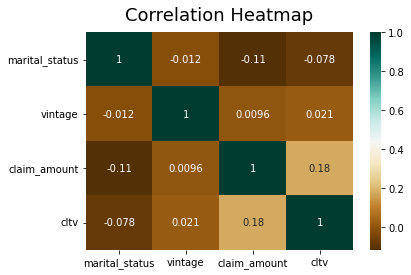

In [9]:
heatmap=sns.heatmap(df.corr(),annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

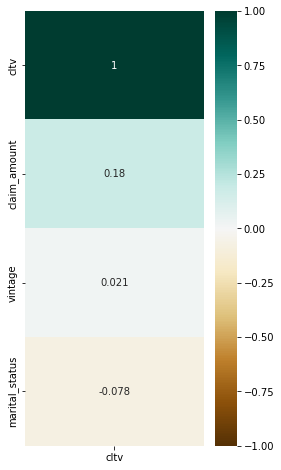

In [10]:
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df.corr()[['cltv']].sort_values(by='cltv', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [11]:
df.dtypes

gender            object
area              object
qualification     object
income            object
marital_status     int64
vintage            int64
claim_amount       int64
num_policies      object
policy            object
type_of_policy    object
cltv               int64
dtype: object

In [12]:
df.count()

gender            89392
area              89392
qualification     89392
income            89392
marital_status    89392
vintage           89392
claim_amount      89392
num_policies      89392
policy            89392
type_of_policy    89392
cltv              89392
dtype: int64

In [13]:
df.value_counts()

gender  area   qualification  income         marital_status  vintage  claim_amount  num_policies  policy  type_of_policy  cltv  
Male    Rural  High School    5L-10L         0               6        0             1             A       Platinum        36528     2
               Bachelor       5L-10L         0               2        0             1             A       Platinum        33036     2
                                             1               6        0             1             A       Platinum        33696     2
Female  Rural  High School    5L-10L         1               7        0             1             A       Platinum        55968     2
                              More than 10L  1               4        0             More than 1   A       Platinum        69036     2
                                                                                                                                   ..
        Urban  High School    5L-10L         0               5     

In [14]:
df.columns.values

array(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy',
       'type_of_policy', 'cltv'], dtype=object)

In [15]:
df.describe()

,marital_status,vintage,claim_amount,cltv
count,89392.000000,89392.000000,89392.000000,89392.000000
mean,0.575488,4.595669,4351.502416,97952.828978
std,0.494272,2.290446,3262.359775,90613.814793
min,0.000000,0.000000,0.000000,24828.000000
25%,0.000000,3.000000,2406.000000,52836.000000
50%,1.000000,5.000000,4089.000000,66396.000000
75%,1.000000,6.000000,6094.000000,103440.000000
max,1.000000,8.000000,31894.000000,724068.000000


In [16]:
df.isnull().sum()

gender            0
area              0
qualification     0
income            0
marital_status    0
vintage           0
claim_amount      0
num_policies      0
policy            0
type_of_policy    0
cltv              0
dtype: int64

In [17]:
df.duplicated().sum()

26

In [18]:
df

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...
89387,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [19]:
df["area"].unique()

array(['Urban', 'Rural'], dtype=object)

In [20]:
df["area"].value_counts()

Urban    62455
Rural    26937
Name: area, dtype: int64

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [22]:
df

,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736
...,...,...,...,...,...,...,...,...,...,...,...
89387,Male,Rural,High School,More than 10L,0,6,0,More than 1,B,Platinum,95736
89388,Male,Urban,Bachelor,5L-10L,1,0,3897,More than 1,A,Platinum,67596
89389,Female,Urban,Bachelor,5L-10L,0,4,3363,More than 1,B,Platinum,114120
89390,Female,Rural,High School,2L-5L,0,8,0,More than 1,B,Platinum,71772


In [23]:
palette_color = sns.color_palette('dark')
explode = [0, 0.1, 0, 0, 0]

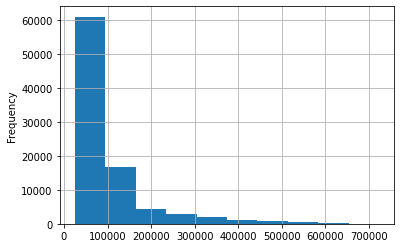

In [24]:
df.cltv.plot(kind='hist' , grid = True)
plt.show()

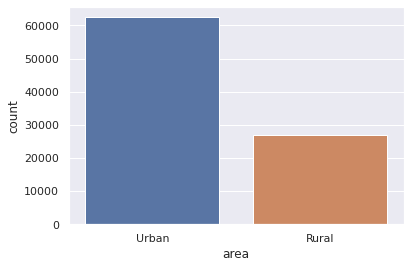

In [25]:
sns.set(rc={'figure.figsize':(6,4)})

sns.countplot(x='area', data=df)

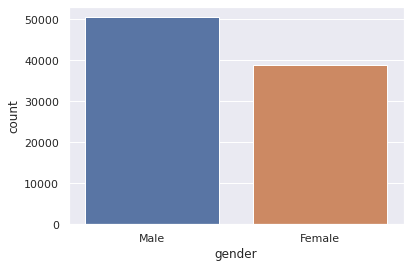

In [26]:
sns.countplot(x='gender', data=df)

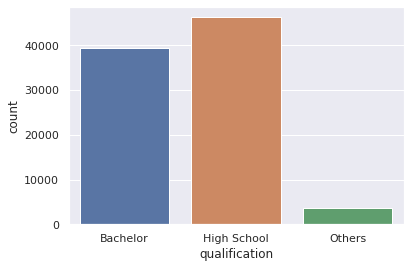

In [27]:
sns.countplot(x='qualification', data=df)

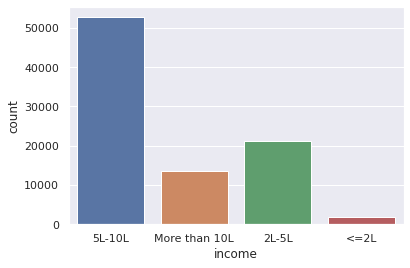

In [28]:
sns.countplot(x='income', data=df)

In [29]:
df['marital_status']=df['marital_status'].replace({0:'Single',1:'Married'})
test['marital_status']=test['marital_status'].replace({0:'Single',1:'Married'})


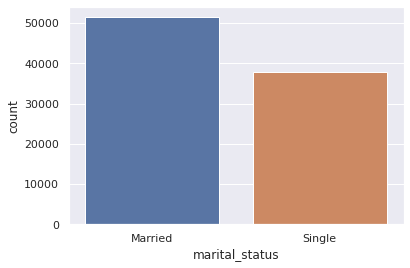

In [30]:
sns.countplot(x='marital_status', data=df)

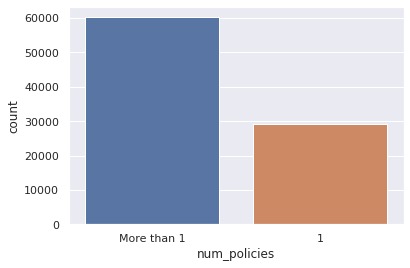

In [31]:
sns.countplot(x='num_policies', data=df)

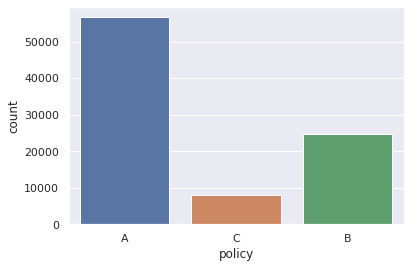

In [32]:
sns.countplot(x='policy', data=df)

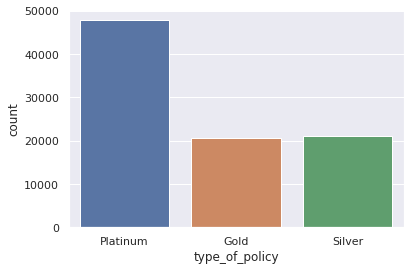

In [33]:
sns.countplot(x='type_of_policy', data=df)

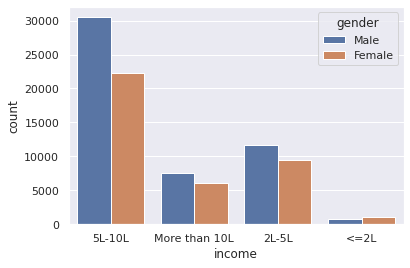

In [34]:
sns.countplot(x='income',hue="gender", data=df)

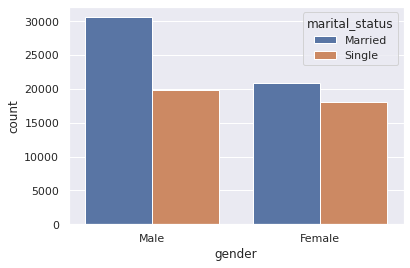

In [35]:
sns.countplot(x='gender',hue="marital_status", data=df)

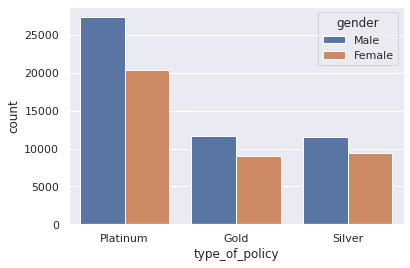

In [36]:
sns.countplot(x='type_of_policy',hue="gender", data=df)

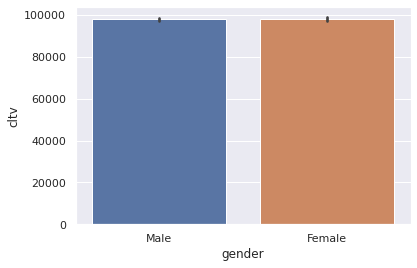

In [37]:
sns.barplot(data=df, x="gender", y="cltv")


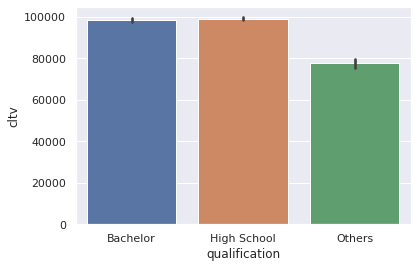

In [38]:
sns.barplot(data=df, x="qualification", y="cltv")


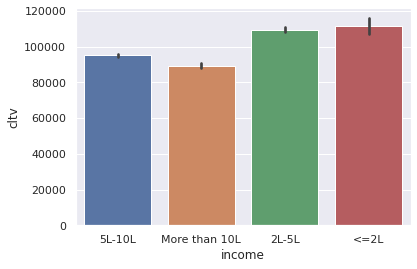

In [39]:
sns.barplot(data=df, x="income", y="cltv")


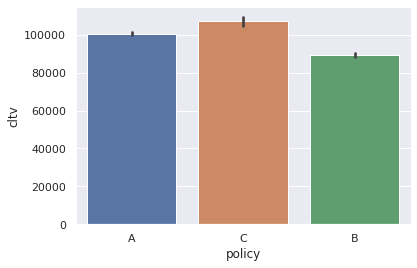

In [40]:
sns.barplot(data=df, x="policy", y="cltv")


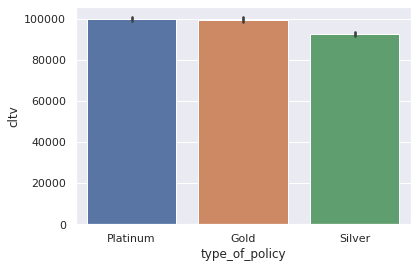

In [41]:
sns.barplot(data=df, x="type_of_policy", y="cltv")


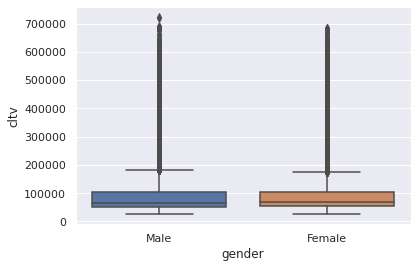

In [42]:
sns.boxplot(x='gender', y='cltv', data=df)

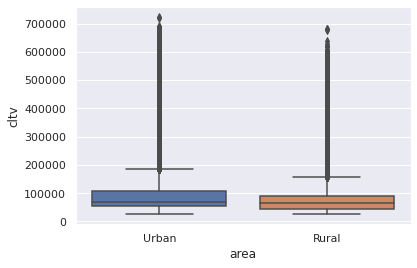

In [43]:
sns.boxplot(x='area', y='cltv', data=df)

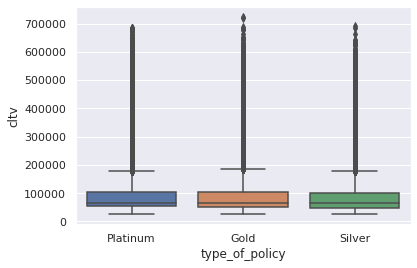

In [44]:
sns.boxplot(x='type_of_policy', y='cltv', data=df)

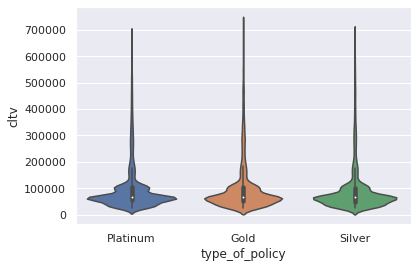

In [45]:
sns.violinplot(x='type_of_policy', y='cltv', data=df)

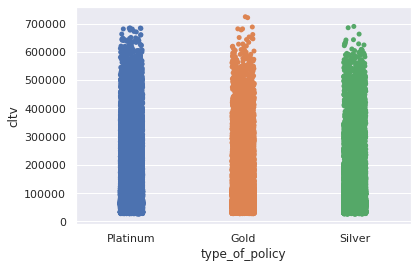

In [46]:
sns.stripplot(x='type_of_policy', y='cltv', data=df)


/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


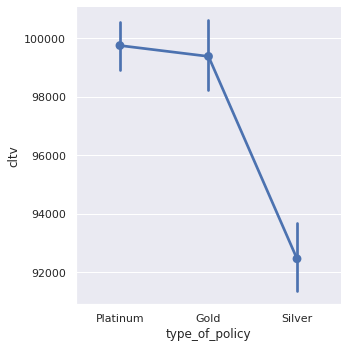

In [47]:
sns.factorplot(x='type_of_policy', y='cltv', data=df)

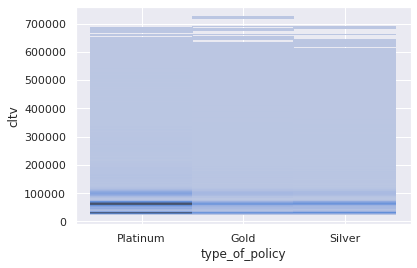

In [48]:
sns.histplot(x='type_of_policy', y='cltv', data=df)

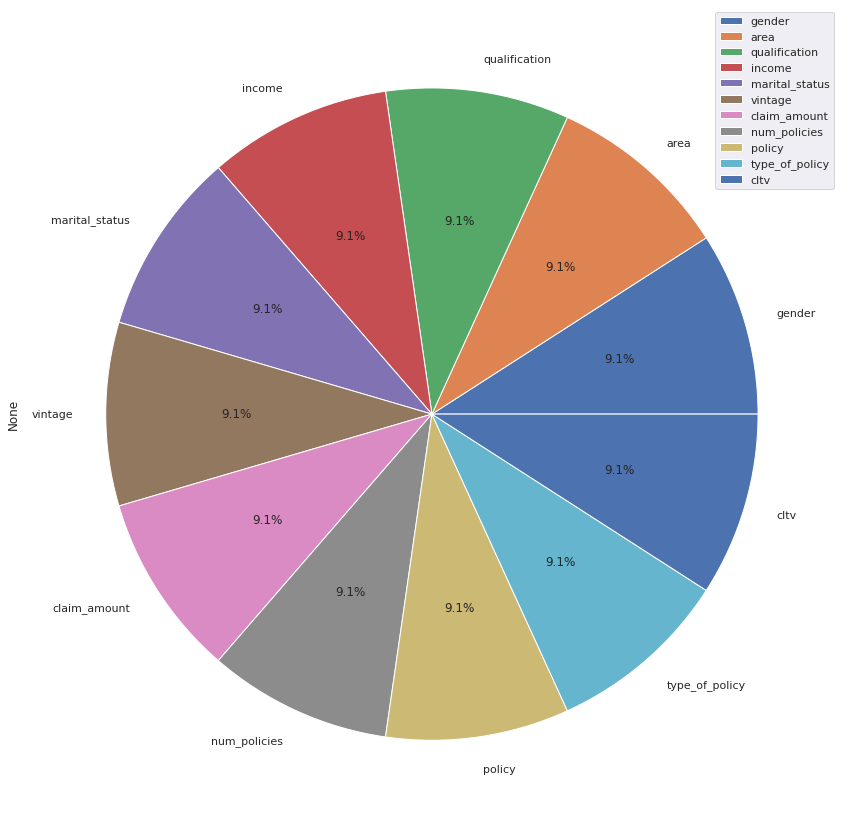

In [49]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)
myexplode = [0.2, 0, 0, 0]

df.count().plot(kind='pie',autopct='%1.1f%%')
plt.legend()

In [50]:
df['gender'] = le.fit_transform(df['gender'])
df['area'] = le.fit_transform(df['area'])
df['qualification'] = le.fit_transform(df['qualification'])
df['income'] = le.fit_transform(df['income'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['num_policies'] = le.fit_transform(df['num_policies'])
df['policy'] = le.fit_transform(df['policy'])
df['type_of_policy'] = le.fit_transform(df['type_of_policy'])

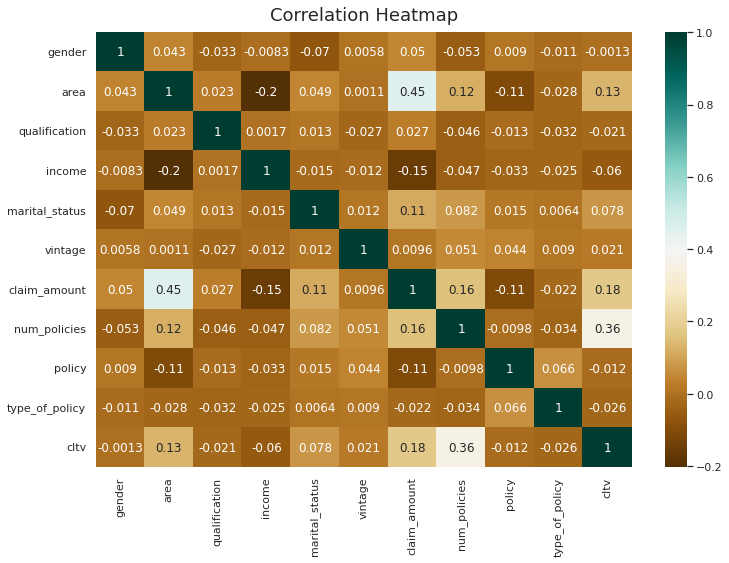

In [51]:
plt.figure(figsize=(12, 8))

heatmap=sns.heatmap(df.corr(),annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

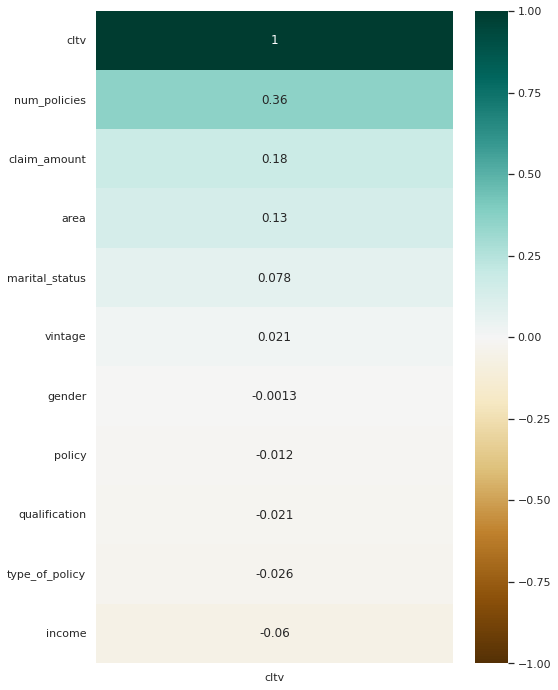

In [52]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['cltv']].sort_values(by='cltv', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Outlier Detection

In [53]:
def plots(df,col):
    fig, ax = plt.subplots(1, 2, figsize=(6,4))
    ax[0].hist(df[col])
    ax[0].set_title(col + ' hist')
    ax[1].boxplot(df[col])
    ax[1].set_title(col + ' boxplot')
    plt.show()

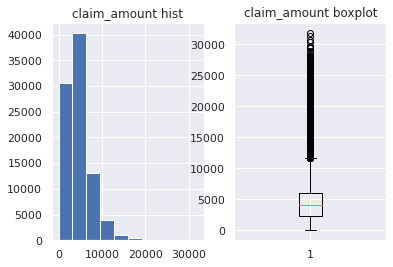

In [54]:
plots(df,'claim_amount')

In [55]:
upper_limit = df['claim_amount'].quantile(0.95)
lower_limit = df['claim_amount'].quantile(0.01)

df = df[(df['claim_amount'] <= upper_limit) & (df['claim_amount'] >=lower_limit)]

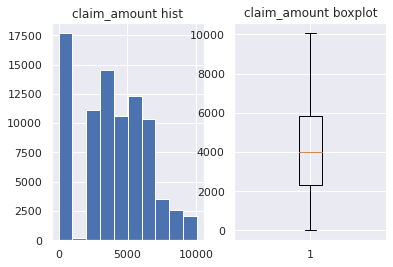

In [56]:
plots(df,'claim_amount')

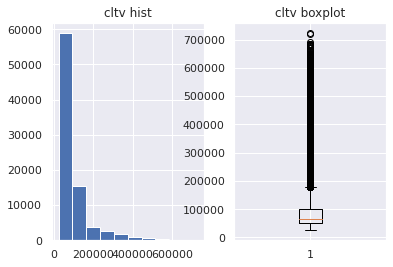

In [57]:
plots(df,'cltv')

In [58]:
upper_limit = df['cltv'].quantile(0.85)
lower_limit = df['cltv'].quantile(0.01)

df = df[(df['cltv'] <= upper_limit) & (df['cltv'] >=lower_limit)]

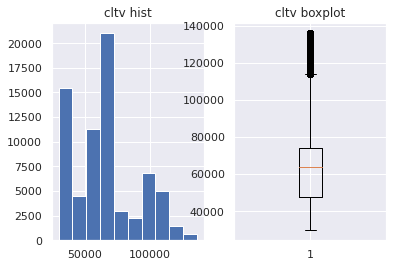

In [59]:
plots(df,'cltv')

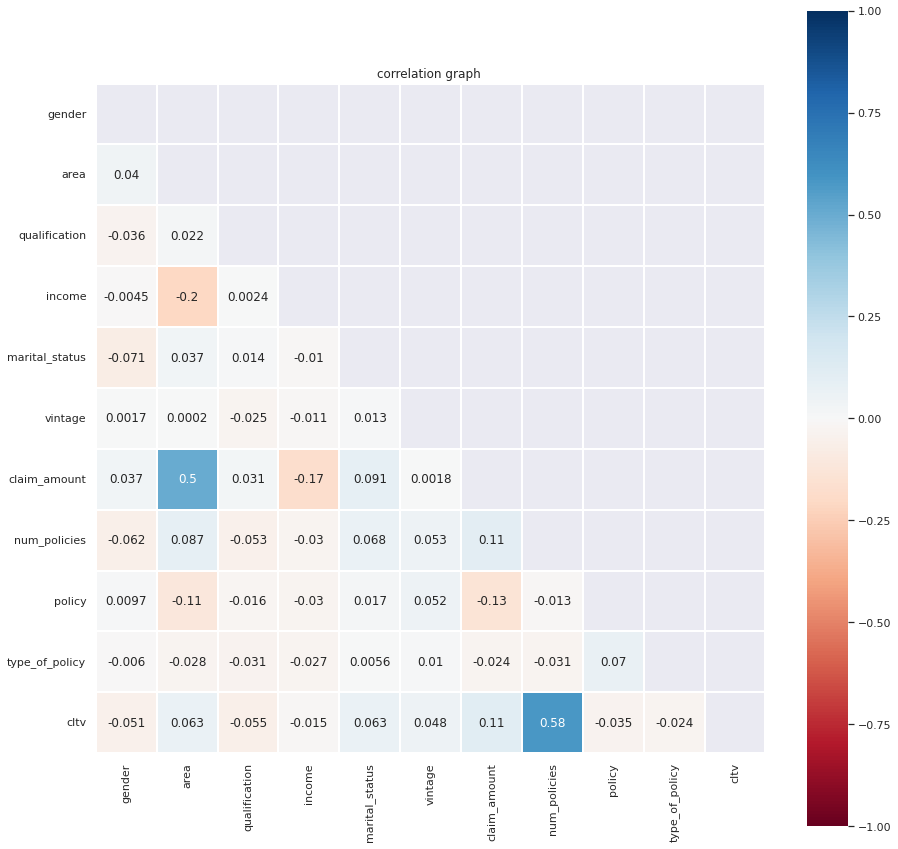

In [60]:
plt.figure(figsize=(15,15))

corr_matrix=df.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, mask=mask, square=True, cmap="RdBu" ,vmin=1,vmax=-1,annot=True,linewidth=1)

plt.title("correlation graph ")

plt.show()

In [61]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [62]:
y = df.pop('cltv')
X = df

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True)

# MACHİNE LEARNİNG

## Linear Regression

In [64]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [65]:
pred = lin_reg.predict(X_test)
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 16929.40326248732
MSE: 410343337.97214186
RMSE: 20256.933084061413
R2 Square 0.342630465008696
__________________________________
Train set evaluation:
_____________________________________
MAE: 16789.056997622287
MSE: 402643307.2138177
RMSE: 20065.973866568693
R2 Square 0.34741037955315146
__________________________________


In [66]:
results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,16929.403262,4.103433e+08,20256.933084,0.34263,0.346041


## Ridge Regression

In [67]:
from sklearn.linear_model import Ridge

model= Ridge(alpha=1, solver='svd',fit_intercept=True ,   random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 16929.342105963908
MSE: 410343291.1031537
RMSE: 20256.931927198493
R2 Square 0.34263054009275873
__________________________________
Train set evaluation:
_____________________________________
MAE: 16788.98389566415
MSE: 402643308.36814654
RMSE: 20065.97389533203
R2 Square 0.34741037768225724
__________________________________


In [68]:
results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,16929.403262,4.103433e+08,20256.933084,0.342630,0.346041
1,Ridge Regression,16929.342106,4.103433e+08,20256.931927,0.342631,0.346041


# XGBRegressor

In [69]:
import xgboost as xgb
from xgboost import XGBRegressor
model= XGBRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

[13:53:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 16798.08847085465
MSE: 407302172.55529046
RMSE: 20181.72868104441
R2 Square 0.3475024083568854
__________________________________
Train set evaluation:
_____________________________________
MAE: 16602.62797930958
MSE: 396799180.15884197
RMSE: 19919.81877826307
R2 Square 0.35688232802049424
__________________________________


In [70]:
results_df_2 = pd.DataFrame(data=[["XGBRegressor", *evaluate(y_test, test_pred) , cross_val(XGBRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

[13:53:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:53:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,16929.403262,4.103433e+08,20256.933084,0.342630,0.346041
1,Ridge Regression,16929.342106,4.103433e+08,20256.931927,0.342631,0.346041
2,XGBRegressor,16798.088471,4.073022e+08,20181.728681,0.347502,0.350639


# Light GBM

In [71]:
from lightgbm import LGBMRegressor

model= LGBMRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 16784.82223916381
MSE: 408123017.926713
RMSE: 20202.05479466663
R2 Square 0.34618741505693706
__________________________________
Train set evaluation:
_____________________________________
MAE: 16312.760973129152
MSE: 384510325.5330994
RMSE: 19608.934839330243
R2 Square 0.37679965641577584
__________________________________


In [72]:
results_df_2 = pd.DataFrame(data=[["LGBMRegressor", *evaluate(y_test, test_pred) , cross_val(LGBMRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,16929.403262,4.103433e+08,20256.933084,0.342630,0.346041
1,Ridge Regression,16929.342106,4.103433e+08,20256.931927,0.342631,0.346041
2,XGBRegressor,16798.088471,4.073022e+08,20181.728681,0.347502,0.350639
3,LGBMRegressor,16784.822239,4.081230e+08,20202.054795,0.346187,0.349671


# ElasticNet¶


In [73]:
from sklearn.linear_model import ElasticNet


model= ElasticNet()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 17646.317228604305
MSE: 504265775.41859126
RMSE: 22455.862829528312
R2 Square 0.19216683293283188
__________________________________
Train set evaluation:
_____________________________________
MAE: 17448.16056438354
MSE: 496977536.02342564
RMSE: 22292.992980383446
R2 Square 0.1945168942497515
__________________________________


In [74]:
results_df_2 = pd.DataFrame(data=[["ElasticNet", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,16929.403262,4.103433e+08,20256.933084,0.342630,0.346041
1,Ridge Regression,16929.342106,4.103433e+08,20256.931927,0.342631,0.346041
2,XGBRegressor,16798.088471,4.073022e+08,20181.728681,0.347502,0.350639
3,LGBMRegressor,16784.822239,4.081230e+08,20202.054795,0.346187,0.349671
4,ElasticNet,17646.317229,5.042658e+08,22455.862830,0.192167,0.193653


## RandomForestRegressor

In [75]:
from sklearn.ensemble import RandomForestRegressor

model= RandomForestRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAE: 17531.27294064416
MSE: 465770306.26285374
RMSE: 21581.71231072395
R2 Square 0.25383652832312786
__________________________________
Train set evaluation:
_____________________________________
MAE: 7734.463637849424
MSE: 104858156.86649464
RMSE: 10240.027190710709
R2 Square 0.8300497150597775
__________________________________


In [76]:
results_df_2 = pd.DataFrame(data=[["RandomForestRegressor", *evaluate(y_test, test_pred) , cross_val(RandomForestRegressor())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
0,Linear Regression,16929.403262,4.103433e+08,20256.933084,0.342630,0.346041
1,Ridge Regression,16929.342106,4.103433e+08,20256.931927,0.342631,0.346041
2,XGBRegressor,16798.088471,4.073022e+08,20181.728681,0.347502,0.350639
3,LGBMRegressor,16784.822239,4.081230e+08,20202.054795,0.346187,0.349671
4,ElasticNet,17646.317229,5.042658e+08,22455.862830,0.192167,0.193653
5,RandomForestRegressor,17531.272941,4.657703e+08,21581.712311,0.253837,0.256671


In [77]:
df.columns

Index(['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy'],
      dtype='object')

In [78]:
feature_names = ['gender', 'area', 'qualification', 'income', 'marital_status',
       'vintage', 'claim_amount', 'num_policies', 'policy', 'type_of_policy']

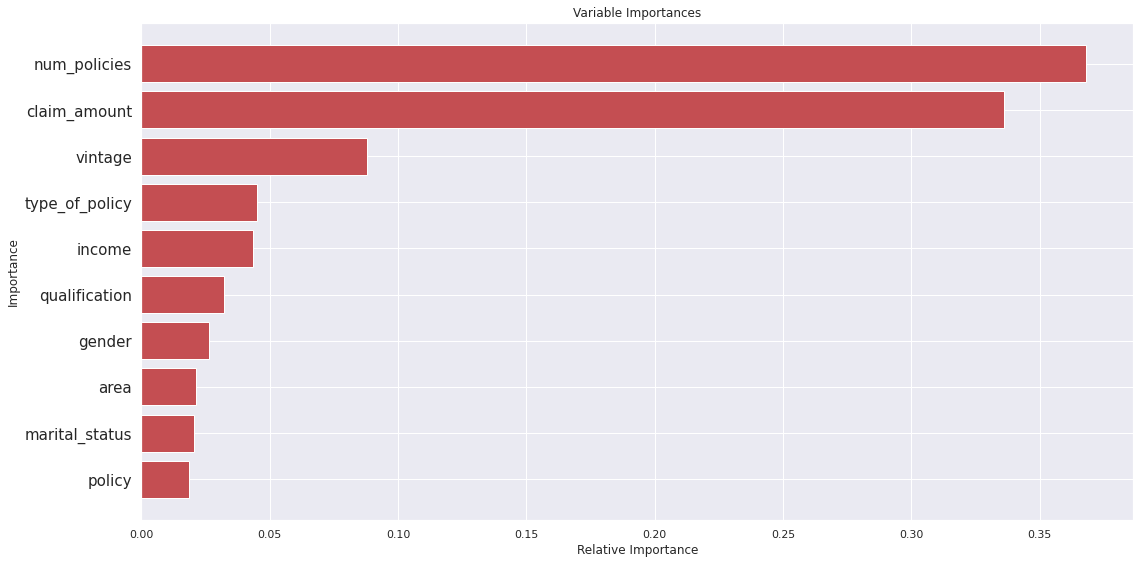

In [79]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(16,8))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='r', align='center',)
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')

plt.yticks( horizontalalignment='right', fontweight='light')
plt.ylabel('Importance'); plt.title('Variable Importances');plt.yticks(size=15)
plt.tight_layout()

plt.show()

In [80]:
results_df.sort_values("MAE")

,Model,MAE,MSE,RMSE,R2 Square,Cross Validation
3,LGBMRegressor,16784.822239,4.081230e+08,20202.054795,0.346187,0.349671
2,XGBRegressor,16798.088471,4.073022e+08,20181.728681,0.347502,0.350639
1,Ridge Regression,16929.342106,4.103433e+08,20256.931927,0.342631,0.346041
0,Linear Regression,16929.403262,4.103433e+08,20256.933084,0.342630,0.346041
5,RandomForestRegressor,17531.272941,4.657703e+08,21581.712311,0.253837,0.256671
4,ElasticNet,17646.317229,5.042658e+08,22455.862830,0.192167,0.193653


## deep learning

In [81]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.wrappers.scikit_learn import KerasRegressor

from keras.models import Sequential
from keras.layers import Dense


In [82]:
# define the keras model
model = Sequential()
model.add(Dense(16, input_shape=(10,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [83]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=tf.keras.losses.MeanAbsoluteError())


In [84]:
model.fit(X_train, y_train, epochs=50, batch_size=10)


Epoch 1/50
5708/5708 [==============================] - 11s 2ms/step - loss: -1696549437440.0000 - mean_absolute_error: 65511.7461
Epoch 2/50
5708/5708 [==============================] - 11s 2ms/step - loss: -18095225700352.0000 - mean_absolute_error: 65511.9883
Epoch 3/50
5708/5708 [==============================] - 10s 2ms/step - loss: -64671591694336.0000 - mean_absolute_error: 65508.3789
Epoch 4/50
5708/5708 [==============================] - 10s 2ms/step - loss: -158191564357632.0000 - mean_absolute_error: 65511.8359
Epoch 5/50
5708/5708 [==============================] - 11s 2ms/step - loss: -315778981167104.0000 - mean_absolute_error: 65507.5469
Epoch 6/50
5708/5708 [==============================] - 10s 2ms/step - loss: -550552865865728.0000 - mean_absolute_error: 65511.8711
Epoch 7/50
5708/5708 [==============================] - 10s 2ms/step - loss: -875369095757824.0000 - mean_absolute_error: 65507.1406
Epoch 8/50
5708/5708 [==============================] - 11s 2ms/step - lo